In [1]:
import sqlalchemy
import pandas
from sqlalchemy import text
from sqlalchemy.orm import sessionmaker, declarative_base
from constFile import my_license, user_name, password, database_name

# 连接本地mysql中名为stock的数据库

# con_insert用于插入和改变数据, con_select用于查询数据
con_insert = sqlalchemy.create_engine('mysql+pymysql://'+user_name+':'+password
                                      + '@localhost:3306/'+database_name+'?charset=utf8')
con_select = con_insert.connect()

# session用于删除操作
Base = declarative_base()
DBsession = sessionmaker(bind=con_insert)
session = DBsession()

In [2]:
sql_index= "select * from (select dm as 股票代码 , mc as 股票名称, t as 时间, name_num as 搜索量, avg(name_num) over(partition by mc) as 平均搜索量, name_num/avg(name_num) over(partition by mc) as 关注度 from search_num where type='all' and datediff(now(),t)<= 30 order by 关注度 desc) a where 时间=date('2023-02-14') and 搜索量 > 1000"
sql_index_query = text(sql_index)
df_index = pandas.read_sql(sql_index_query, con=con_select)
df_index

,股票代码,股票名称,时间,搜索量,平均搜索量,关注度
0,002354,天娱数科,2023-02-14,10180,1291.275862,7.883676
1,002660,茂硕电源,2023-02-14,2581,421.103448,6.129135
2,300114,中航电测,2023-02-14,32521,5776.931034,5.629460
3,002229,鸿博股份,2023-02-14,5256,953.000000,5.515215
4,001314,亿道信息,2023-02-14,4260,804.758621,5.293513
...,...,...,...,...,...,...
821,300459,汤姆猫,2023-02-14,1888,3607.724138,0.523322
822,000596,古井贡酒,2023-02-14,1729,3354.551724,0.515419
823,000423,东阿阿胶,2023-02-14,1322,2595.448276,0.509353
824,002543,万和电气,2023-02-14,2376,4778.655172,0.497211


In [3]:
list = []
for item in df_index['股票代码']:
    list.append(item)
list

['002354',
 '002660',
 '300114',
 '002229',
 '001314',
 '600449',
 '000584',
 '002677',
 '002385',
 '002734',
 '003035',
 '300501',
 '002626',
 '300071',
 '002733',
 '600018',
 '002882',
 '000925',
 '002649',
 '300198',
 '002228',
 '300261',
 '600282',
 '002825',
 '002951',
 '002328',
 '600559',
 '002140',
 '600501',
 '300541',
 '300444',
 '002562',
 '002156',
 '600031',
 '002641',
 '002117',
 '000990',
 '600817',
 '002792',
 '002342',
 '600354',
 '002215',
 '002281',
 '300473',
 '300340',
 '300449',
 '300603',
 '000425',
 '002547',
 '000629',
 '600320',
 '600371',
 '002224',
 '300250',
 '000599',
 '600313',
 '300476',
 '000682',
 '000536',
 '002131',
 '300502',
 '300418',
 '300229',
 '000829',
 '000400',
 '002185',
 '002350',
 '002325',
 '300267',
 '002488',
 '600210',
 '300846',
 '002123',
 '300612',
 '000059',
 '000938',
 '300087',
 '300264',
 '002591',
 '300292',
 '000713',
 '002339',
 '002806',
 '000716',
 '000878',
 '002457',
 '002362',
 '600765',
 '300189',
 '300474',
 '002336',

In [4]:
len(list)

826

In [5]:
import requests
import json

index = []
count = 1
for item in list:
    print('共有'+str(count)+'/'+str(len(list))+'条目')
    print('正在处理'+item)
    try:
        url = 'http://api.mairui.club/hsmy/lscj/' + item + '/' + my_license
        response = requests.get(url)
        data_json = json.loads(response.text)
        data = data_json[0]['zdf']
        print(item+'的涨跌幅为'+data)
        index.append(float(data))
        print('操作成功')
        count += 1
    except:
        continue
        print('操作失败')
        count += 1

index

共有1/826条目
正在处理002354
002354的涨跌幅为-2.04
操作成功
共有2/826条目
正在处理002660
002660的涨跌幅为0.35
操作成功
共有3/826条目
正在处理300114
300114的涨跌幅为4.48
操作成功
共有4/826条目
正在处理002229
002229的涨跌幅为9.99
操作成功
共有5/826条目
正在处理001314
001314的涨跌幅为10.00
操作成功
共有6/826条目
正在处理600449
600449的涨跌幅为10.03
操作成功
共有7/826条目
正在处理000584
000584的涨跌幅为3.90
操作成功
共有8/826条目
正在处理002677
002677的涨跌幅为5.51
操作成功
共有9/826条目
正在处理002385
002385的涨跌幅为-0.84
操作成功
共有10/826条目
正在处理002734
002734的涨跌幅为1.78
操作成功
共有11/826条目
正在处理003035
003035的涨跌幅为-1.39
操作成功
共有12/826条目
正在处理300501
300501的涨跌幅为5.66
操作成功
共有13/826条目
正在处理002626
002626的涨跌幅为6.80
操作成功
共有14/826条目
正在处理300071
300071的涨跌幅为2.65
操作成功
共有15/826条目
正在处理002733
002733的涨跌幅为-3.66
操作成功
共有16/826条目
正在处理600018
600018的涨跌幅为-0.75
操作成功
共有17/826条目
正在处理002882
002882的涨跌幅为-0.36
操作成功
共有18/826条目
正在处理000925
000925的涨跌幅为-0.22
操作成功
共有19/826条目
正在处理002649
002649的涨跌幅为0.66
操作成功
共有20/826条目
正在处理300198
300198的涨跌幅为-1.48
操作成功
共有21/826条目
正在处理002228
002228的涨跌幅为-2.39
操作成功
共有22/826条目
正在处理300261
300261的涨跌幅为-0.08
操作成功
共有23/826条目
正在处理600282
600282的涨跌幅为-0.26
操作成功
共有24/82

[-2.04,
 0.35,
 4.48,
 9.99,
 10.0,
 10.03,
 3.9,
 5.51,
 -0.84,
 1.78,
 -1.39,
 5.66,
 6.8,
 2.65,
 -3.66,
 -0.75,
 -0.36,
 -0.22,
 0.66,
 -1.48,
 -2.39,
 -0.08,
 -0.26,
 2.56,
 3.64,
 2.12,
 0.16,
 -2.34,
 6.1,
 3.59,
 1.72,
 -2.73,
 2.8,
 -0.6,
 -2.6,
 10.03,
 -0.41,
 -2.2,
 10.01,
 -3.66,
 -1.23,
 -1.9,
 2.8,
 -3.13,
 13.22,
 3.97,
 2.73,
 -1.9,
 -0.8,
 -1.55,
 -1.53,
 0.22,
 0.2,
 20.0,
 -0.83,
 -0.82,
 5.43,
 -0.21,
 10.23,
 1.02,
 1.98,
 1.98,
 4.84,
 9.97,
 1.75,
 1.95,
 -0.7,
 0.46,
 -1.85,
 0.28,
 -0.49,
 3.34,
 10.03,
 1.71,
 -1.3,
 4.26,
 0.18,
 1.97,
 -3.3,
 4.9,
 -0.11,
 1.62,
 0.0,
 1.91,
 0.23,
 -0.23,
 3.01,
 -0.38,
 0.0,
 2.55,
 0.0,
 3.65,
 -1.66,
 -1.29,
 0.0,
 -0.7,
 1.59,
 -2.18,
 5.78,
 2.72,
 -1.46,
 5.82,
 0.26,
 -0.42,
 -3.38,
 13.0,
 -0.98,
 -1.46,
 -0.98,
 0.68,
 -0.77,
 0.17,
 0.35,
 3.21,
 0.3,
 1.07,
 4.94,
 2.09,
 9.99,
 -2.1,
 -1.86,
 0.15,
 0.0,
 -1.16,
 6.0,
 1.92,
 -1.58,
 0.0,
 0.15,
 0.05,
 9.99,
 -0.5,
 -2.96,
 5.36,
 -1.48,
 -0.63,
 -0.65,
 5.99,

In [6]:
len(index)

823

In [7]:
value = []
for item in df_index['关注度']:
    value.append(item)

value

[7.883675594840708,
 6.129135276776941,
 5.629459622398242,
 5.515215110178384,
 5.293512726026224,
 5.27948717948718,
 4.885517695714233,
 4.870679137860919,
 4.356543767029973,
 4.348772523884388,
 4.318984645424692,
 4.290799115970688,
 4.0402620226873305,
 3.920245398773006,
 3.913009370233166,
 3.876090665366805,
 3.7668821586676975,
 3.671405913673955,
 3.5963089802130894,
 3.5075002622469316,
 3.4947074560893334,
 3.492235954547512,
 3.454937282422501,
 3.3859802847754654,
 3.379766297662977,
 3.3672459499263625,
 3.277315534424431,
 3.2263665594855304,
 3.2214749536178107,
 3.1667101714086834,
 3.1553977272727276,
 3.1128912284717054,
 3.0926250985779338,
 3.023209467205164,
 3.0147570260362815,
 3.009410662578777,
 2.9642200947683977,
 2.926435902339517,
 2.8810600351670432,
 2.8798522276135863,
 2.8451195219123506,
 2.835081402629931,
 2.8114525597717357,
 2.8032241876803408,
 2.7570897257089726,
 2.742064817908453,
 2.7400832357913907,
 2.6899324739103743,
 2.684746455038805

In [8]:
len(value)


826

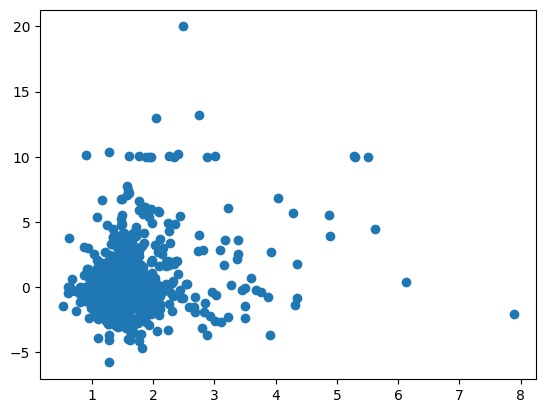

In [11]:
from matplotlib import pyplot

pyplot.figure()
pyplot.scatter(value[0:822],index[0:822])
pyplot.show()

In [15]:
sql_index_today= "select * from (select dm as 股票代码 , mc as 股票名称, t as 时间, name_num as 搜索量, avg(name_num) over(partition by mc) as 平均搜索量, name_num/avg(name_num) over(partition by mc) as 今日关注度 from search_num where type='all' and datediff(now(),t)<= 30 order by 今日关注度 desc) a where 时间=date('2023-02-14') and 搜索量 > 1000"
sql_index_today_query = text(sql_index_today)
df_index_today = pandas.read_sql(sql_index_today_query, con=con_select)
df_index_today

,股票代码,股票名称,时间,搜索量,平均搜索量,今日关注度
0,002354,天娱数科,2023-02-14,10180,1291.275862,7.883676
1,002660,茂硕电源,2023-02-14,2581,421.103448,6.129135
2,300114,中航电测,2023-02-14,32521,5776.931034,5.629460
3,002229,鸿博股份,2023-02-14,5256,953.000000,5.515215
4,001314,亿道信息,2023-02-14,4260,804.758621,5.293513
...,...,...,...,...,...,...
821,300459,汤姆猫,2023-02-14,1888,3607.724138,0.523322
822,000596,古井贡酒,2023-02-14,1729,3354.551724,0.515419
823,000423,东阿阿胶,2023-02-14,1322,2595.448276,0.509353
824,002543,万和电气,2023-02-14,2376,4778.655172,0.497211


In [16]:
sql_index_yesterday= "select * from (select dm as 股票代码 , mc as 股票名称, t as 时间, name_num as 搜索量, avg(name_num) over(partition by mc) as 平均搜索量, name_num/avg(name_num) over(partition by mc) as 昨日关注度 from search_num where type='all' and datediff(now(),t)<= 30 order by 昨日关注度 desc) a where 时间=date('2023-02-13') and 搜索量 > 1000"
sql_index_yesterday_query = text(sql_index_yesterday)
df_index_yesterday = pandas.read_sql(sql_index_yesterday_query, con=con_select)
df_index_yesterday

,股票代码,股票名称,时间,搜索量,平均搜索量,昨日关注度
0,002951,金时科技,2023-02-13,1703,336.413793,5.062218
1,002354,天娱数科,2023-02-13,5962,1291.275862,4.617139
2,300501,海顺新材,2023-02-13,1313,296.448276,4.429103
3,300071,福石控股,2023-02-13,1327,326.000000,4.070552
4,002228,合兴包装,2023-02-13,1194,296.448276,4.027684
...,...,...,...,...,...,...
860,600733,北汽蓝谷,2023-02-13,2158,3345.586207,0.645029
861,002713,东易日盛,2023-02-13,1792,2849.137931,0.628962
862,000596,古井贡酒,2023-02-13,1928,3354.551724,0.574741
863,000423,东阿阿胶,2023-02-13,1284,2595.448276,0.494712
